# Importing Useful Libraries

In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv1D
from keras.layers import Bidirectional, LSTM
import scipy
from keras.regularizers import l1,l2

# Reading recorded ECG data

(31376,)

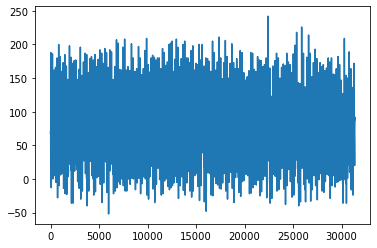

In [2]:
recorded_data = np.loadtxt('ECG_Final_Data_Recording_V2.txt')
plt.plot(recorded_data)
recorded_data.shape

# Slicing the data to get first 30000 data points

In [3]:
r_data = recorded_data[:30000]

In [4]:
r_data.shape

(30000,)

# Generating Training examples from our data

In [5]:
training_examples =[]
for i in range(24): 
    a= r_data[i*1250:(i+1)*1250]
    training_examples.append(a)

In [6]:
T_E= np.array(training_examples)

In [7]:
T_E.shape

(24, 1250)

# Reading the abnormal ECG data from Incart dataset

In [8]:
def get_data(files:list):
    data = [] # empty list
    for file_name in files:
        path = 'Project_data/' + file_name
        rec = wfdb.rdrecord(path)
        ecg = rec.p_signal[:, 0]
        ecg = scipy.fft.fft(ecg)
        data.append(ecg)
        
    examples = []
    for signal in data:
        for i in range(24):
            x = signal[i * 1250:(i + 1) * 1250] #total data points 30000 divided by 5 sec samling frequency that is 1250
            examples.append(x)
    return examples

In [9]:
abnormal_data= get_data(['I21']) #I21 has following diseases: PVCs, APCs, atrial couplets, blocked APCs.

In [10]:
a_data = np.array(abnormal_data)

In [11]:
a_data.shape

(24, 1250)

# Generating `X` features using both data's

In [12]:
X= np.array([*T_E, *a_data])

In [13]:
X.shape

(48, 1250)

# Generating `Y` labels using both data's

In [14]:
labels = []
for i in range(2):
    for j in range(24):
        labels.append(i)
Y = np.array(labels)
Y.shape

(48,)

# Shuflling the data 

In [15]:
from sklearn.utils import shuffle

In [16]:
X,Y = shuffle(X,Y)

# Splitting the data set into training and test set.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

# Neural Network Model for training

## Model 1 without Regularization and Dropout


Optimizer= Adam, 
Loss= Cross Entropy Loss, 
Number of Epochs= 150, 
Activation Function= Sigmoid

In [18]:
prediction_model = Sequential()
# Add the first layer
prediction_model.add(Dense(96, activation='sigmoid',input_shape=(1250,), kernel_initializer='normal'))
prediction_model.add(Dense(96, activation='sigmoid', kernel_initializer='normal'))
prediction_model.add(Dense(96, activation='relu', kernel_initializer='normal'))
prediction_model.add(Dense(96, activation='relu', kernel_initializer='normal'))
prediction_model.add(Dense(2, activation='softmax', kernel_initializer='normal'))

## Model 2 with Regularization and Dropout

Optimizer= Adam, 
Loss= Cross Entropy Loss, 
Number of Epochs= 150, 
Activation Function= Relu
Regularization parameter = 0.001, 
Drop out parameter = 0.3, 


In [19]:
prediction_model = Sequential()
prediction_model.add(Dense(96, activation='relu',input_shape=(1250,), kernel_initializer='normal'))
prediction_model.add(Dense(96, activation='relu', kernel_initializer='normal', kernel_regularizer=l1(0.001)))
prediction_model.add(Dense(96, activation='relu', kernel_initializer='normal'))
prediction_model.add(Dense(96, activation='sigmoid', kernel_initializer='normal'))
prediction_model.add(Dropout(0.3))
prediction_model.add(Dense(2, activation='softmax', kernel_initializer='normal'))

In [20]:
# Compile your model with sgd
prediction_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the batch normalized model you recently built, store its history callback
output = prediction_model.fit(x_train, y_train,64, validation_data=(x_test,y_test), epochs=150, verbose=1)

Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 1.0746 - accuracy: 0.5152 - val_loss: 0.8892 - val_accuracy: 1.0000
Epoch 2/150
1/1 [==============================] - 0s 46ms/step - loss: 0.8890 - accuracy: 0.9091 - val_loss: 0.7988 - val_accuracy: 1.0000
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 0.7891 - accuracy: 0.9697 - val_loss: 0.7266 - val_accuracy: 1.0000
Epoch 4/150
1/1 [==============================] - 0s 46ms/step - loss: 0.6998 - accuracy: 1.0000 - val_loss: 0.6616 - val_accuracy: 1.0000
Epoch 5/150
1/1 [==============================] - 0s 45ms/step - loss: 0.6358 - accuracy: 1.0000 - val_loss: 0.6106 - val_accuracy: 1.0000
Epoch 6/150
1/1 [==============================] - 0s 44ms/step - loss: 0.5759 - accuracy: 1.0000 - val_loss: 0.5695 - val_accuracy: 1.0000
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.5520 - accuracy: 1.0000 - val_loss: 0.5365 - val_accuracy: 1.0000
Epoch 8/150
1/1 [=====

1/1 [==============================] - 0s 42ms/step - loss: 0.1866 - accuracy: 1.0000 - val_loss: 0.1853 - val_accuracy: 1.0000
Epoch 60/150
1/1 [==============================] - 0s 45ms/step - loss: 0.1857 - accuracy: 1.0000 - val_loss: 0.1820 - val_accuracy: 1.0000
Epoch 61/150
1/1 [==============================] - 0s 42ms/step - loss: 0.1835 - accuracy: 1.0000 - val_loss: 0.1787 - val_accuracy: 1.0000
Epoch 62/150
1/1 [==============================] - 0s 43ms/step - loss: 0.1779 - accuracy: 1.0000 - val_loss: 0.1755 - val_accuracy: 1.0000
Epoch 63/150
1/1 [==============================] - 0s 39ms/step - loss: 0.1752 - accuracy: 1.0000 - val_loss: 0.1724 - val_accuracy: 1.0000
Epoch 64/150
1/1 [==============================] - 0s 47ms/step - loss: 0.1721 - accuracy: 1.0000 - val_loss: 0.1693 - val_accuracy: 1.0000
Epoch 65/150
1/1 [==============================] - 0s 42ms/step - loss: 0.1705 - accuracy: 1.0000 - val_loss: 0.1662 - val_accuracy: 1.0000
Epoch 66/150
1/1 [========

1/1 [==============================] - 0s 41ms/step - loss: 0.0619 - accuracy: 1.0000 - val_loss: 0.0641 - val_accuracy: 1.0000
Epoch 118/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0601 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 1.0000
Epoch 119/150
1/1 [==============================] - 0s 42ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 0.0618 - val_accuracy: 1.0000
Epoch 120/150
1/1 [==============================] - 0s 44ms/step - loss: 0.0605 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 1.0000
Epoch 121/150
1/1 [==============================] - 0s 42ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 1.0000
Epoch 122/150
1/1 [==============================] - 0s 39ms/step - loss: 0.0557 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 1.0000
Epoch 123/150
1/1 [==============================] - 0s 44ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.0575 - val_accuracy: 1.0000
Epoch 124/150
1/1 [=

In [21]:
prediction_model.save('Final_Prediction_model')
prediction_model.save_weights('Final_Prediction_model_weights')

INFO:tensorflow:Assets written to: Final_Prediction_model\assets


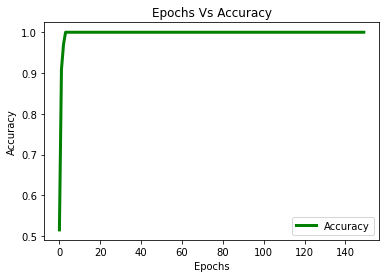

In [22]:
plt.plot(output.history['accuracy'],label='Accuracy', color= "Green", linewidth='3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs Vs Accuracy')
plt.legend()
plt.show()

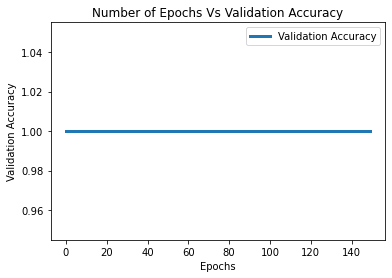

In [23]:
plt.plot(output.history['val_accuracy'],label='Validation Accuracy', linewidth='3')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Number of Epochs Vs Validation Accuracy')
plt.legend()
plt.show()

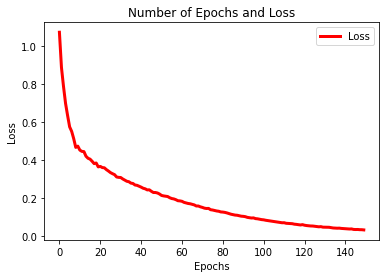

In [24]:
plt.plot(output.history['loss'],label='Loss', color= "red", linewidth= '3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Number of Epochs and Loss')
plt.legend()
plt.show()